EMPLOYEE ABSENTEESISM

In [92]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fancyimpute import KNN
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


In [3]:
os.chdir("C:/Users/ARON/Desktop/edwisor projects/employee absenteesim")

In [4]:
os.getcwd()

'C:\\Users\\ARON\\Desktop\\edwisor projects\\employee absenteesim'

In [5]:
data=pd.read_excel("Absenteeism_at_work_Project (6).xlsx")
data_original=data.copy()

In [8]:
data.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
6,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
7,20,23.0,7.0,6,1,260.0,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
8,14,19.0,7.0,2,1,155.0,12.0,14.0,34.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
9,1,22.0,7.0,2,1,235.0,11.0,14.0,37.0,239554.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0


In [9]:
data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [27]:
data.columns=data.columns.str.replace(' ','')

In [28]:
data.columns

Index(['ID', 'Reasonforabsence', 'Monthofabsence', 'Dayoftheweek', 'Seasons',
       'Transportationexpense', 'DistancefromResidencetoWork', 'Servicetime',
       'Age', 'WorkloadAverage/day', 'Hittarget', 'Disciplinaryfailure',
       'Education', 'Son', 'Socialdrinker', 'Socialsmoker', 'Pet', 'Weight',
       'Height', 'Bodymassindex', 'Absenteeismtimeinhours'],
      dtype='object')

In [29]:
data.describe()

,ID,Reasonforabsence,Monthofabsence,Dayoftheweek,Seasons,Transportationexpense,DistancefromResidencetoWork,Servicetime,Age,WorkloadAverage/day,...,Disciplinaryfailure,Education,Son,Socialdrinker,Socialsmoker,Pet,Weight,Height,Bodymassindex,Absenteeismtimeinhours
count,740.000000,737.000000,739.000000,740.000000,740.000000,733.000000,737.000000,737.000000,737.000000,730.000000,...,734.000000,730.000000,734.000000,737.000000,736.000000,738.000000,739.000000,726.000000,709.000000,718.000000
mean,18.017568,19.188602,6.319350,3.914865,2.544595,221.035471,29.667571,12.565807,36.449118,271188.860274,...,0.053134,1.295890,1.017711,0.567164,0.073370,0.746612,79.063599,172.152893,26.684062,6.977716
std,11.021247,8.437493,3.435948,1.421675,1.111831,66.954179,14.848124,4.389813,6.480148,38981.880873,...,0.224453,0.676965,1.094928,0.495805,0.260919,1.319726,12.868630,6.081065,4.292819,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [30]:
type(data)

pandas.core.frame.DataFrame

In [31]:
data['ID'].nunique()

36

In [32]:
data['ID'].value_counts()

3     113
28     76
34     55
22     46
20     42
11     40
15     37
36     34
24     30
14     29
33     24
10     24
1      23
17     20
5      19
18     16
13     15
25     10
6       8
9       8
23      8
27      7
30      7
12      7
7       6
2       6
29      5
26      5
32      5
31      3
19      3
21      3
16      2
8       2
35      1
4       1
Name: ID, dtype: int64

In [13]:
#from above we see that there are 36 employees, whose data is provided

In [33]:
#let us see the no of unique values in the data 

for i in data.columns:
    print(i,'-',len(data[i].value_counts()))

ID - 36
Reasonforabsence - 28
Monthofabsence - 13
Dayoftheweek - 5
Seasons - 4
Transportationexpense - 24
DistancefromResidencetoWork - 25
Servicetime - 18
Age - 22
WorkloadAverage/day - 38
Hittarget - 13
Disciplinaryfailure - 2
Education - 4
Son - 5
Socialdrinker - 2
Socialsmoker - 2
Pet - 6
Weight - 26
Height - 14
Bodymassindex - 17
Absenteeismtimeinhours - 19


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                             740 non-null int64
Reasonforabsence               737 non-null float64
Monthofabsence                 739 non-null float64
Dayoftheweek                   740 non-null int64
Seasons                        740 non-null int64
Transportationexpense          733 non-null float64
DistancefromResidencetoWork    737 non-null float64
Servicetime                    737 non-null float64
Age                            737 non-null float64
WorkloadAverage/day            730 non-null float64
Hittarget                      734 non-null float64
Disciplinaryfailure            734 non-null float64
Education                      730 non-null float64
Son                            734 non-null float64
Socialdrinker                  737 non-null float64
Socialsmoker                   736 non-null float64
Pet                            738 non-null float64
Weight           

In [35]:
#converting appropriate categorical variable into actual categorical variable 

data['ID']=data['ID'].astype('category')
data['Reasonforabsence']=data['Reasonforabsence'].astype('category')
data['Monthofabsence']=data['Monthofabsence'].astype('category')
data['Dayoftheweek']=data['Dayoftheweek'].astype('category')
data['Seasons']=data['Seasons'].astype('category')
data['Disciplinaryfailure']=data['Disciplinaryfailure'].astype('category')
data['Education']=data['Education'].astype('category')
data['Son']=data['Son'].astype('category')
data['Socialdrinker']=data['Socialdrinker'].astype('category')
data['Socialsmoker']=data['Socialsmoker'].astype('category')
data['Pet']=data['Pet'].astype('category')



# ANALYSIS 

In [17]:
#UNIVARIATE


C:\Users\ARON\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ARON\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


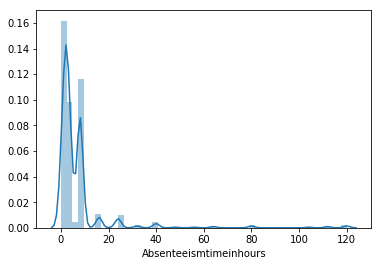

In [36]:
%matplotlib inline
df=data.dropna() 
sns.distplot(df['Absenteeismtimeinhours'])

#we see that the variable is towards left which mean it is not normally distrbuted

In [19]:
#we see that the data is left skewed

C:\Users\ARON\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ARON\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ARON\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ARON\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and h

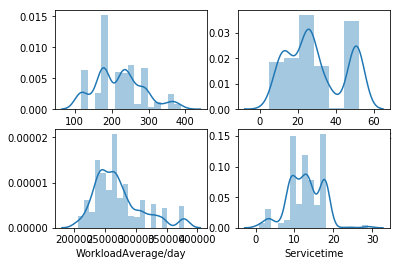

In [37]:
plt.figure(1)
plt.subplot(221)
sns.distplot(df['Transportationexpense'])

plt.subplot(222)
sns.distplot(df['DistancefromResidencetoWork'])

plt.subplot(223)
sns.distplot(df['WorkloadAverage/day'])

plt.subplot(224)
sns.distplot(df['Servicetime'])



C:\Users\ARON\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ARON\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ARON\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ARON\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and h

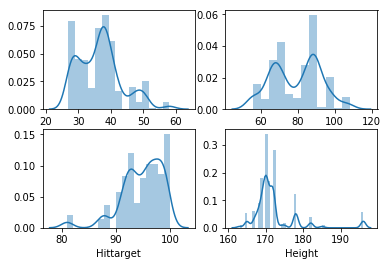

In [21]:
plt.figure(1)
plt.subplot(221)
sns.distplot(df['Age'])

plt.subplot(222)
sns.distplot(df['Weight'])
plt.subplot(223)
sns.distplot(df['Hittarget'])
plt.subplot(224)
sns.distplot(df['Height'])

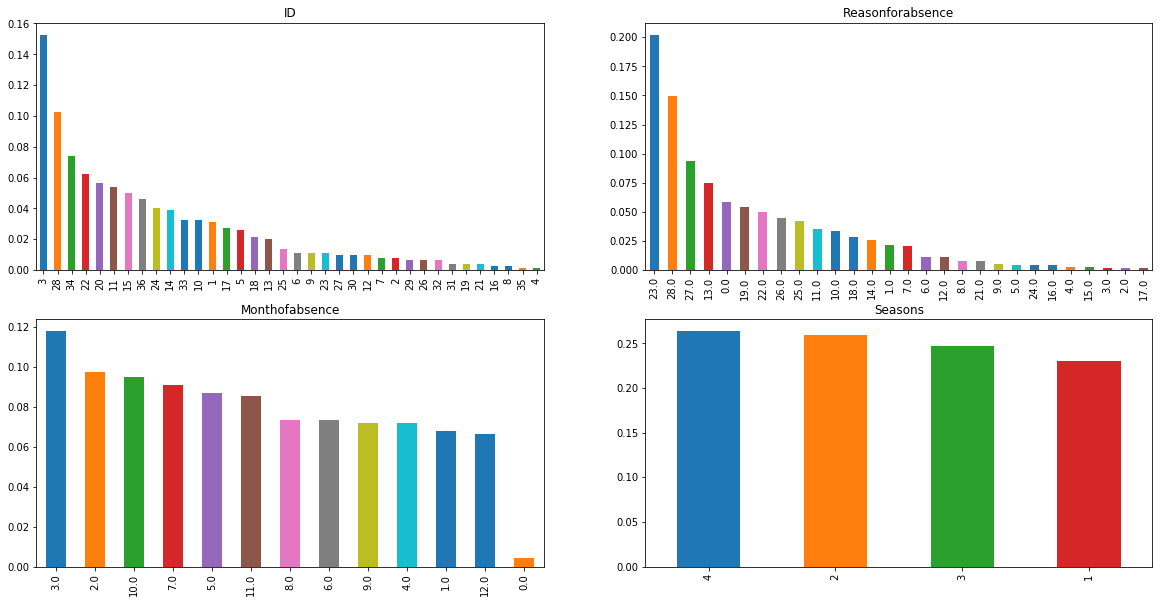

In [22]:
#let us see categorical variables

plt.figure(1)
plt.subplot(221)
data['ID'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'ID')

plt.subplot(222)
data['Reasonforabsence'].value_counts(normalize=True).plot.bar(title= 'Reasonforabsence')

plt.subplot(223)
data['Monthofabsence'].value_counts(normalize=True).plot.bar(title= 'Monthofabsence')

plt.subplot(224)
data['Seasons'].value_counts(normalize=True).plot.bar(title= 'Seasons')

plt.show()

In [23]:
data.columns

Index(['ID', 'Reasonforabsence', 'Monthofabsence', 'Dayoftheweek', 'Seasons',
       'Transportationexpense', 'DistancefromResidencetoWork', 'Servicetime',
       'Age', 'WorkloadAverage/day', 'Hittarget', 'Disciplinaryfailure',
       'Education', 'Son', 'Socialdrinker', 'Socialsmoker', 'Pet', 'Weight',
       'Height', 'Bodymassindex', 'Absenteeismtimeinhours'],
      dtype='object')

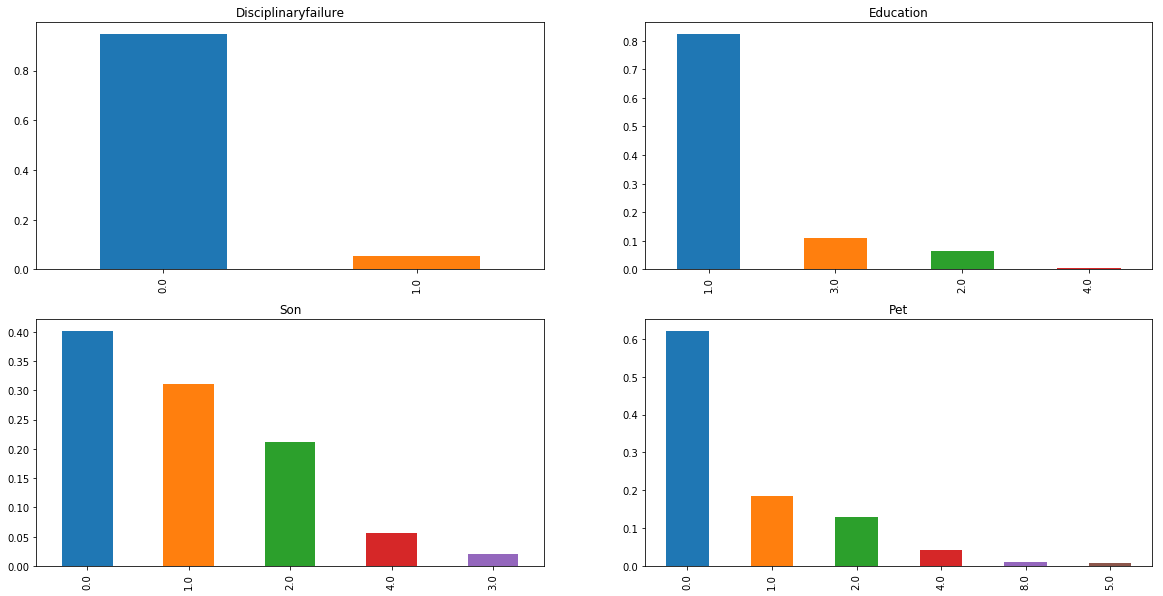

In [38]:
plt.figure(1)
plt.subplot(221)
data['Disciplinaryfailure'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Disciplinaryfailure')

plt.subplot(222)
data['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(223)
data['Son'].value_counts(normalize=True).plot.bar(title= 'Son')

plt.subplot(224)
data['Pet'].value_counts(normalize=True).plot.bar(title= 'Pet')

plt.show()

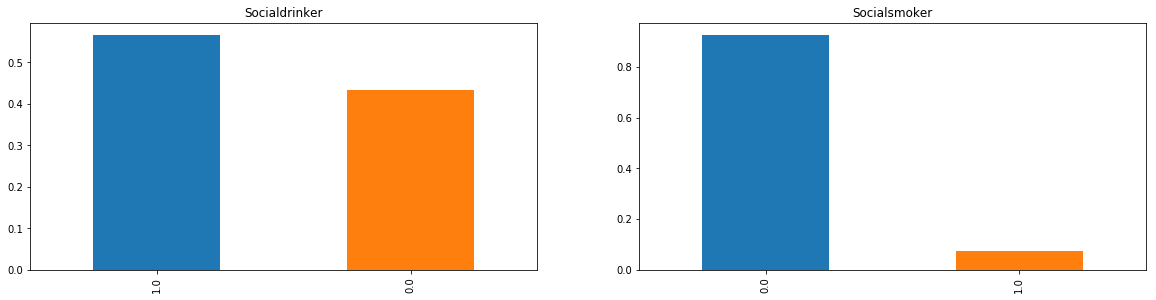

In [39]:
plt.figure(1)
plt.subplot(221)
data['Socialdrinker'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Socialdrinker')

plt.subplot(222)
data['Socialsmoker'].value_counts(normalize=True).plot.bar(title= 'Socialsmoker')

#there are many employees who doesnt smokw

In [26]:
#bivariate



In [40]:
data.columns

Index(['ID', 'Reasonforabsence', 'Monthofabsence', 'Dayoftheweek', 'Seasons',
       'Transportationexpense', 'DistancefromResidencetoWork', 'Servicetime',
       'Age', 'WorkloadAverage/day', 'Hittarget', 'Disciplinaryfailure',
       'Education', 'Son', 'Socialdrinker', 'Socialsmoker', 'Pet', 'Weight',
       'Height', 'Bodymassindex', 'Absenteeismtimeinhours'],
      dtype='object')

C:\Users\ARON\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ARON\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ARON\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


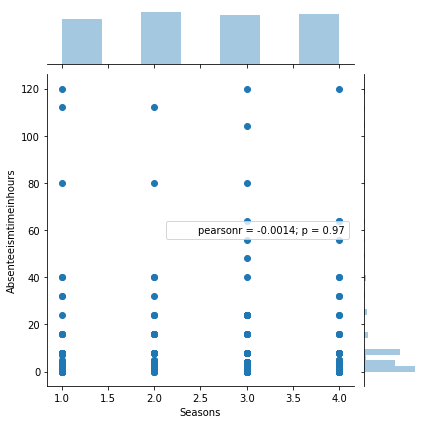

In [41]:
sns.jointplot(x='Seasons',y='Absenteeismtimeinhours',data=data)

C:\Users\ARON\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ARON\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ARON\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


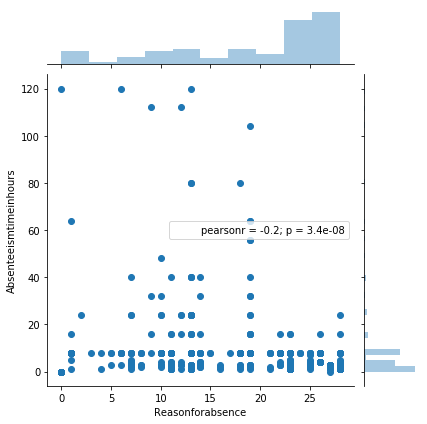

In [42]:
sns.jointplot(x='Reasonforabsence',y='Absenteeismtimeinhours',data=data)

In [30]:
#most number of absenteeism are because of physiotherapy(27)

In [43]:
reason = data.groupby('Reasonforabsence')

In [44]:
reason['Absenteeismtimeinhours'].max()

Reasonforabsence
0.0     120.0
1.0      64.0
2.0      24.0
3.0       8.0
4.0       8.0
5.0       8.0
6.0     120.0
7.0      40.0
8.0       8.0
9.0     112.0
10.0     48.0
11.0     40.0
12.0    112.0
13.0    120.0
14.0     40.0
15.0      8.0
16.0      3.0
17.0      8.0
18.0     80.0
19.0    104.0
21.0      8.0
22.0     16.0
23.0     16.0
24.0      8.0
25.0      8.0
26.0     16.0
27.0      3.0
28.0     24.0
Name: Absenteeismtimeinhours, dtype: float64

In [33]:
# (6),(9)(12)(13)(19) are some of the major reasons of absenteeism

C:\Users\ARON\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ARON\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ARON\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


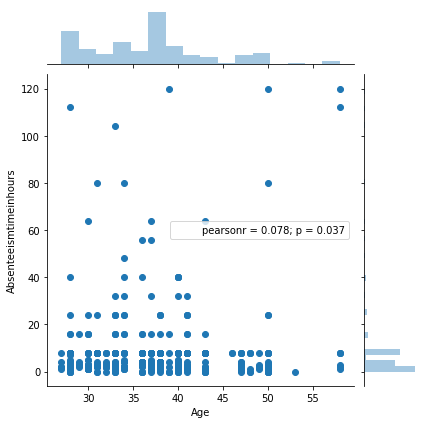

In [45]:
sns.jointplot(x='Age',y='Absenteeismtimeinhours',data=data)


In [35]:
#this shows that age is correlated 

C:\Users\ARON\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 864x432 with 0 Axes>

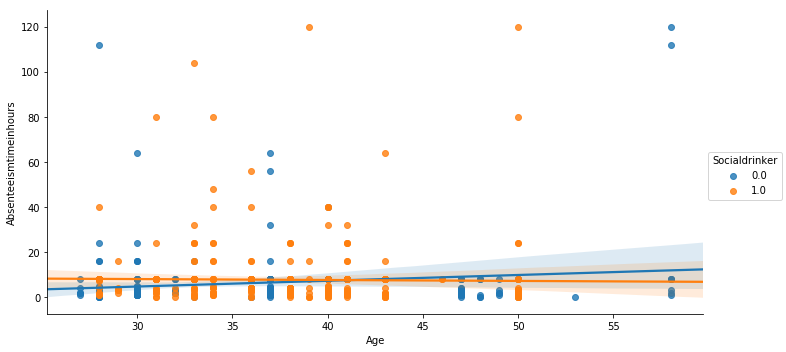

In [46]:
plt.figure(figsize=(12,6))
sns.lmplot(x='Age',y='Absenteeismtimeinhours',data=data,hue='Socialdrinker',size=5,aspect=2)



In [37]:
# we see that from age 33-45 has more abseenteeism and also they are social drinker so the reason may be they cannot come most of the day because of the hangover

C:\Users\ARON\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 864x432 with 0 Axes>

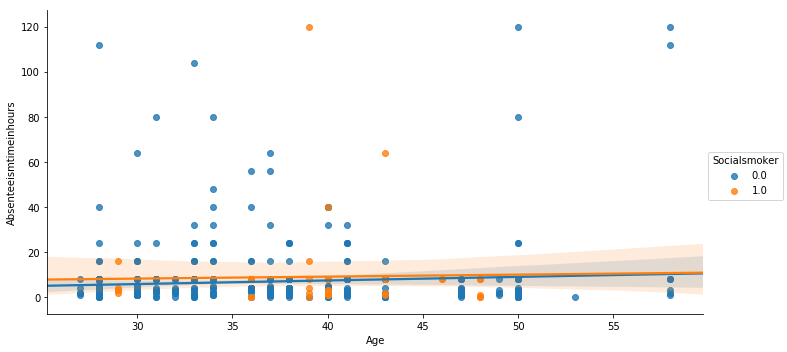

In [47]:
plt.figure(figsize=(12,6))
sns.lmplot(x='Age',y='Absenteeismtimeinhours',data=data,hue='Socialsmoker',size=5,aspect=2)

In [39]:
#most of the non smoker stays absent for more hours ans smokers stays present 

C:\Users\ARON\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 864x432 with 0 Axes>

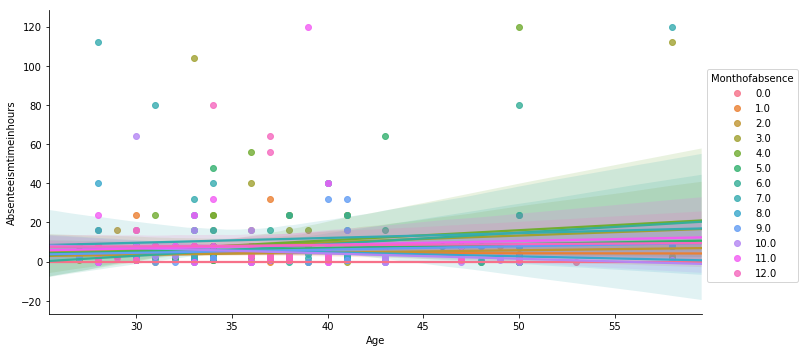

In [48]:
plt.figure(figsize=(12,6))
sns.lmplot(x='Age',y='Absenteeismtimeinhours',data=data,hue='Monthofabsence',size=5,aspect=2)

In [41]:
#most of the employee remains absent in winter 


C:\Users\ARON\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ARON\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ARON\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


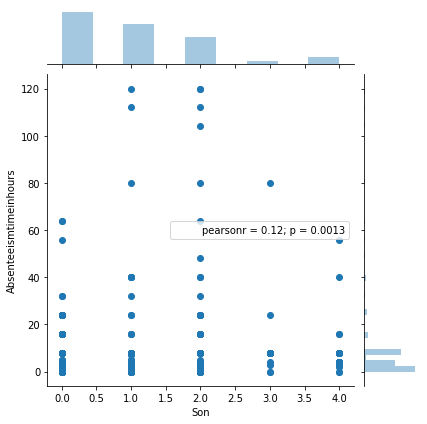

In [42]:
sns.jointplot(x='Son',y='Absenteeismtimeinhours',data=data)


In [43]:
# employees having 1 or 2 childern stays absent for long as they might haveto look after them

# Mising value

In [44]:
#lets see if there are any missing values

In [49]:
data.isnull().sum()

ID                              0
Reasonforabsence                3
Monthofabsence                  1
Dayoftheweek                    0
Seasons                         0
Transportationexpense           7
DistancefromResidencetoWork     3
Servicetime                     3
Age                             3
WorkloadAverage/day            10
Hittarget                       6
Disciplinaryfailure             6
Education                      10
Son                             6
Socialdrinker                   3
Socialsmoker                    4
Pet                             2
Weight                          1
Height                         14
Bodymassindex                  31
Absenteeismtimeinhours         22
dtype: int64

In [50]:
data.head(20)

,ID,Reasonforabsence,Monthofabsence,Dayoftheweek,Seasons,Transportationexpense,DistancefromResidencetoWork,Servicetime,Age,WorkloadAverage/day,...,Disciplinaryfailure,Education,Son,Socialdrinker,Socialsmoker,Pet,Weight,Height,Bodymassindex,Absenteeismtimeinhours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
6,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
7,20,23.0,7.0,6,1,260.0,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
8,14,19.0,7.0,2,1,155.0,12.0,14.0,34.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
9,1,22.0,7.0,2,1,235.0,11.0,14.0,37.0,239554.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0


In [47]:
#create missing value 
#original=179  By mean= 221   median=221  knn= 221

#data['Transportation expense'].loc[5]
#data['Transportation expense'].loc[5]=np.nan

#Impute with mean
#data['Transportation expense']=data['Transportation expense'].fillna(data['Transportation expense']).mean()

#Impute with median
#data['Transportation expense']=data['Transportation expense'].fillna(data['Transportation expense']).median()

In [51]:
data= pd.DataFrame(KNN(k = 3).complete(data), columns = data.columns)


Imputing row 1/740 with 0 missing, elapsed time: 0.149
Imputing row 101/740 with 1 missing, elapsed time: 0.153
Imputing row 201/740 with 0 missing, elapsed time: 0.155
Imputing row 301/740 with 0 missing, elapsed time: 0.155
Imputing row 401/740 with 0 missing, elapsed time: 0.155
Imputing row 501/740 with 0 missing, elapsed time: 0.159
Imputing row 601/740 with 0 missing, elapsed time: 0.159
Imputing row 701/740 with 0 missing, elapsed time: 0.159


In [49]:
#from above analysis we see that all the methods gives us same values, so we freeze KNN

In [52]:
data.isnull().sum()

ID                             0
Reasonforabsence               0
Monthofabsence                 0
Dayoftheweek                   0
Seasons                        0
Transportationexpense          0
DistancefromResidencetoWork    0
Servicetime                    0
Age                            0
WorkloadAverage/day            0
Hittarget                      0
Disciplinaryfailure            0
Education                      0
Son                            0
Socialdrinker                  0
Socialsmoker                   0
Pet                            0
Weight                         0
Height                         0
Bodymassindex                  0
Absenteeismtimeinhours         0
dtype: int64

# Outlier analysis

In [51]:
#let us check outlier

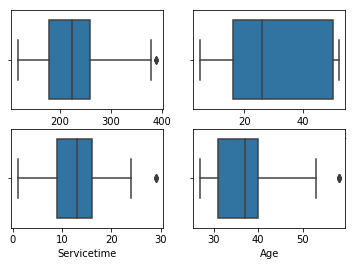

In [53]:
plt.figure(1)
plt.subplot(221)
sns.boxplot(data['Transportationexpense'])

plt.subplot(222)
sns.boxplot(data['DistancefromResidencetoWork'])

plt.subplot(223)
sns.boxplot(data['Servicetime'])

plt.subplot(224)
sns.boxplot(data['Age'])

In [53]:
#except 'distance from Residence to Work', rest three has outliers

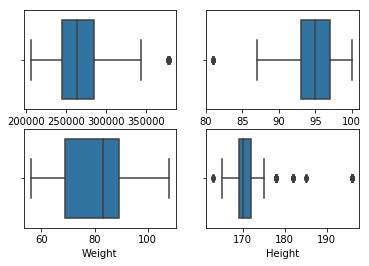

In [54]:
plt.figure(1)
plt.subplot(221)
sns.boxplot(data['WorkloadAverage/day'])

plt.subplot(222)
sns.boxplot(data['Hittarget'])

plt.subplot(223)
sns.boxplot(data['Weight'])

plt.subplot(224)
sns.boxplot(data['Height'])

In [55]:
# except weight all other has outliers

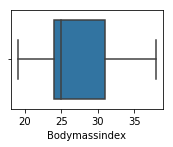

In [55]:

plt.subplot(221)
sns.boxplot(data['Bodymassindex'])



In [56]:
#let us get all the variables having outliers in a single list

coutlier= ["Transportationexpense","Servicetime","Age","WorkloadAverage/day","Hittarget","Height"]

In [57]:
coutlier

['Transportationexpense',
 'Servicetime',
 'Age',
 'WorkloadAverage/day',
 'Hittarget',
 'Height']

In [58]:
for i in coutlier:
    #print(i)
    q75, q25 = np.percentile(data.loc[:,i], [75 ,25])
    iqr = q75 - q25
    minn = q25 - (iqr*1.5)
    maxx = q75 + (iqr*1.5)
#Converting to nan
    data.loc[data.loc[:,i] < minn,i] = np.nan
    data.loc[data.loc[:,i] > maxx,i] = np.nan
    print('{var} - {X} '.format(var = i, X = (data.loc[:,i].isnull().sum())))

Transportationexpense - 3 
Servicetime - 5 
Age - 8 
WorkloadAverage/day - 31 
Hittarget - 19 
Height - 119 


In [59]:
#using knn for removing this outliers
data= pd.DataFrame(KNN(k = 3).complete(data), columns = data.columns)


Imputing row 1/740 with 0 missing, elapsed time: 0.147
Imputing row 101/740 with 1 missing, elapsed time: 0.162
Imputing row 201/740 with 0 missing, elapsed time: 0.163
Imputing row 301/740 with 0 missing, elapsed time: 0.163
Imputing row 401/740 with 0 missing, elapsed time: 0.163
Imputing row 501/740 with 0 missing, elapsed time: 0.163
Imputing row 601/740 with 0 missing, elapsed time: 0.163
Imputing row 701/740 with 0 missing, elapsed time: 0.163


In [60]:
data.isnull().sum()

ID                             0
Reasonforabsence               0
Monthofabsence                 0
Dayoftheweek                   0
Seasons                        0
Transportationexpense          0
DistancefromResidencetoWork    0
Servicetime                    0
Age                            0
WorkloadAverage/day            0
Hittarget                      0
Disciplinaryfailure            0
Education                      0
Son                            0
Socialdrinker                  0
Socialsmoker                   0
Pet                            0
Weight                         0
Height                         0
Bodymassindex                  0
Absenteeismtimeinhours         0
dtype: int64

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                             740 non-null float64
Reasonforabsence               740 non-null float64
Monthofabsence                 740 non-null float64
Dayoftheweek                   740 non-null float64
Seasons                        740 non-null float64
Transportationexpense          740 non-null float64
DistancefromResidencetoWork    740 non-null float64
Servicetime                    740 non-null float64
Age                            740 non-null float64
WorkloadAverage/day            740 non-null float64
Hittarget                      740 non-null float64
Disciplinaryfailure            740 non-null float64
Education                      740 non-null float64
Son                            740 non-null float64
Socialdrinker                  740 non-null float64
Socialsmoker                   740 non-null float64
Pet                            740 non-null float64
Weight     

In [61]:
#converting appropriate categorical variable into actual categorical variable 

data['ID']=data['ID'].astype('category')
data['Reasonforabsence']=data['Reasonforabsence'].astype('category')
data['Monthofabsence']=data['Monthofabsence'].astype('category')
data['Dayoftheweek']=data['Dayoftheweek'].astype('category')
data['Seasons']=data['Seasons'].astype('category')
data['Disciplinaryfailure']=data['Disciplinaryfailure'].astype('category')
data['Education']=data['Education'].astype('category')
data['Son']=data['Son'].astype('category')
data['Socialdrinker']=data['Socialdrinker'].astype('category')
data['Socialsmoker']=data['Socialsmoker'].astype('category')
data['Pet']=data['Pet'].astype('category')


# feature selection

In [64]:
#let us first distinguish numeric and categorical variables

In [101]:
cname = data.columns[(data.dtypes=="float64")|(data.dtypes=="int64")].tolist()
print(cname)

['Transportationexpense', 'DistancefromResidencetoWork', 'Servicetime', 'Age', 'WorkloadAverage/day', 'Hittarget', 'Height', 'Bodymassindex', 'Absenteeismtimeinhours']


In [66]:
#cname.remove("Absenteeism time in hours")

In [102]:
cname

['Transportationexpense',
 'DistancefromResidencetoWork',
 'Servicetime',
 'Age',
 'WorkloadAverage/day',
 'Hittarget',
 'Height',
 'Bodymassindex',
 'Absenteeismtimeinhours']

In [64]:
cat_name=data.columns[(data.dtypes=="category")].tolist()
print(cat_name)

['ID', 'Reasonforabsence', 'Monthofabsence', 'Dayoftheweek', 'Seasons', 'Disciplinaryfailure', 'Education', 'Son', 'Socialdrinker', 'Socialsmoker', 'Pet']


In [65]:
cat_name.remove("ID")

In [66]:
cname

['Transportationexpense',
 'DistancefromResidencetoWork',
 'Servicetime',
 'Age',
 'WorkloadAverage/day',
 'Hittarget',
 'Weight',
 'Height',
 'Bodymassindex',
 'Absenteeismtimeinhours']

In [67]:
cat_name

['Reasonforabsence',
 'Monthofabsence',
 'Dayoftheweek',
 'Seasons',
 'Disciplinaryfailure',
 'Education',
 'Son',
 'Socialdrinker',
 'Socialsmoker',
 'Pet']

In [68]:
#let us see the correlation

data_corr=data.loc[:,cname]

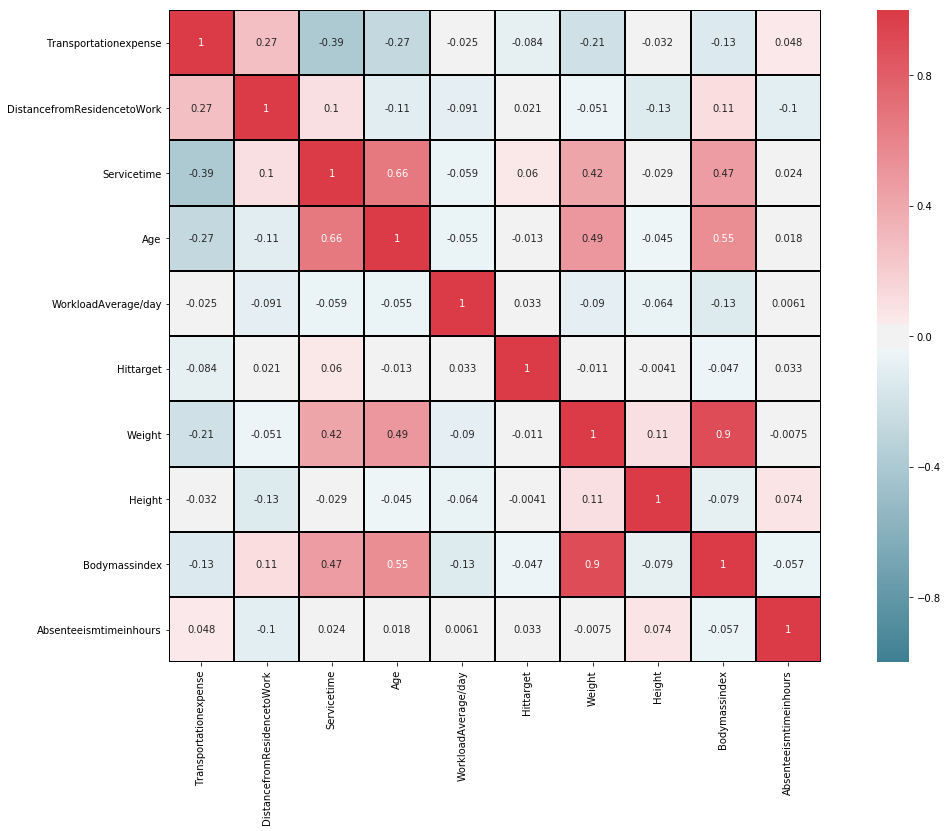

In [69]:
# Correlation matrix

#generating correlation matrix
corr=data_corr.corr()

#Setting up the pane or matrix size
f, ax = plt.subplots(figsize=(20,12)) 

#Plot using Seaborn library
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),\
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1)

In [74]:
#we see that weight is highly correlated tobody mass index so lets remove weight

In [70]:
data=data.drop(['Weight','ID'],axis=1)

In [76]:
data.head(3)

,Reasonforabsence,Monthofabsence,Dayoftheweek,Seasons,Transportationexpense,DistancefromResidencetoWork,Servicetime,Age,WorkloadAverage/day,Hittarget,Disciplinaryfailure,Education,Son,Socialdrinker,Socialsmoker,Pet,Height,Bodymassindex,Absenteeismtimeinhours
0,26.0,7.0,3.0,1.0,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,172.000000,30.0,4.0
1,0.0,7.0,3.0,1.0,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,170.000009,31.0,0.0
2,23.0,7.0,4.0,1.0,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,170.000000,31.0,2.0


In [77]:
# now let us see anova test for categorical varibles

In [71]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy import stats

In [72]:
formula = 'Absenteeismtimeinhours ~ C(Seasons)+C(Monthofabsence)+C(Pet)+C(Son)+C(Socialdrinker)+C(Reasonforabsence)+C(Dayoftheweek)+C(Disciplinaryfailure)+C(Education)+C(Socialsmoker)  '


In [73]:
model = ols(formula, data=data).fit()


In [74]:
aov_table = anova_lm(model, typ=2)

In [75]:
aov_table

,sum_sq,df,F,PR(>F)
C(Seasons),127.149286,3.0,0.286570,8.351163e-01
C(Monthofabsence),1523.725596,13.0,0.792505,6.685861e-01
C(Pet),963.424967,6.0,1.085688,3.693750e-01
C(Son),1393.312901,7.0,1.345826,2.258732e-01
C(Socialdrinker),428.345056,3.0,0.965408,4.085621e-01
C(Reasonforabsence),22209.491646,30.0,5.005596,8.007219e-16
C(Dayoftheweek),1059.151555,4.0,1.790344,1.289871e-01
C(Disciplinaryfailure),36.109285,2.0,0.122075,8.851017e-01
C(Education),950.332937,8.0,0.803201,5.998996e-01
C(Socialsmoker),210.338617,1.0,1.422189,2.334694e-01


In [83]:
#we see that reason of absesnse has valuess less than 0.05, rest all are above 0.05 so we drop all varibles except reason of absense

In [76]:
data=data.drop(['Seasons','Monthofabsence','Pet','Son','Socialdrinker','Dayoftheweek','Disciplinaryfailure','Education','Socialsmoker'],axis=1)

In [98]:
data.head(10)

,Reasonforabsence,Transportationexpense,DistancefromResidencetoWork,Servicetime,Age,WorkloadAverage/day,Hittarget,Height,Bodymassindex,Absenteeismtimeinhours
0,26.0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,172.000000,30.0,4.000000
1,0.0,0.000000,0.170213,0.739130,0.884615,0.244925,0.769231,170.000009,31.0,0.000000
2,23.0,0.234615,0.978723,0.739130,0.423077,0.244925,0.769231,170.000000,31.0,2.000000
3,7.0,0.619231,0.000000,0.565217,0.461538,0.244925,0.769231,168.000000,24.0,4.000000
4,23.0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,172.000000,30.0,2.000000
5,23.0,0.234615,0.978723,0.739130,0.423077,0.244925,0.769231,170.000000,31.0,2.000009
6,22.0,0.909307,1.000000,0.086957,0.038462,0.244925,0.769231,172.000000,27.0,8.000000
7,23.0,0.546154,0.957447,0.434783,0.346154,0.244925,0.769231,168.000000,23.0,4.000000
8,19.0,0.142308,0.148936,0.565217,0.269231,0.244925,0.769231,168.966823,25.0,40.000000
9,22.0,0.450000,0.127660,0.565217,0.384615,0.244925,0.769231,172.000000,29.0,8.000000


AttributeError: 'list' object has no attribute 'drop'

# feature scaling

In [103]:

#Nomalisation
for i in cname:
    print(i)
    data[i] = (data[i] - min(data[i]))/(max(data[i]) - min(data[i]))

Transportationexpense
DistancefromResidencetoWork
Servicetime
Age
WorkloadAverage/day
Hittarget
Height
Bodymassindex
Absenteeismtimeinhours


In [106]:
data.head(10)

,Reasonforabsence,Transportationexpense,DistancefromResidencetoWork,Servicetime,Age,WorkloadAverage/day,Hittarget,Height,Bodymassindex,Absenteeismtimeinhours
0,26.0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.700000,0.578947,0.033333
1,0.0,0.000000,0.170213,0.739130,0.884615,0.244925,0.769231,0.500001,0.631579,0.000000
2,23.0,0.234615,0.978723,0.739130,0.423077,0.244925,0.769231,0.500000,0.631579,0.016667
3,7.0,0.619231,0.000000,0.565217,0.461538,0.244925,0.769231,0.300000,0.263158,0.033333
4,23.0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.700000,0.578947,0.016667
5,23.0,0.234615,0.978723,0.739130,0.423077,0.244925,0.769231,0.500000,0.631579,0.016667
6,22.0,0.909307,1.000000,0.086957,0.038462,0.244925,0.769231,0.700000,0.421053,0.066667
7,23.0,0.546154,0.957447,0.434783,0.346154,0.244925,0.769231,0.300000,0.210526,0.033333
8,19.0,0.142308,0.148936,0.565217,0.269231,0.244925,0.769231,0.396682,0.315789,0.333333
9,22.0,0.450000,0.127660,0.565217,0.384615,0.244925,0.769231,0.700000,0.526316,0.066667


# MODEL BUILDING 

In [107]:
#Divide data into train and test


train, test = train_test_split(data, test_size=0.2)


In [108]:
train.shape

(592, 10)

In [109]:
test.shape

(148, 10)

In [110]:
data.shape

(740, 10)

#DECISION TREE

In [111]:
#building decision tree

regr_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:9], train.iloc[:,9])



In [112]:
# predicting

pred_DT=regr_DT.predict(test.iloc[:,0:9])


In [113]:
#calcuate rmse value

from sklearn.metrics import mean_squared_error
from math import sqrt

In [114]:
rmse = sqrt(mean_squared_error(test.iloc[:,9], pred_DT))

In [115]:
rmse

0.11060498640843083

In [95]:
#rmse value is 12.49

#RANDOM FOREST

In [116]:
# building model

regr_RF = RandomForestRegressor(n_estimators=500,random_state=101).fit(train.iloc[:,0:9], train.iloc[:,9])

In [117]:
pred_RF=regr_RF.predict(test.iloc[:,0:9])

In [118]:
rmse = sqrt(mean_squared_error(test.iloc[:,9], pred_RF))
print(rmse)

0.12363266124149788


In [99]:
#rmse=13.08

In [ ]:
# we fix the decision tree model as it hasless rmse value